In [12]:
# Scrap EspnCricInfo Bowlers data website
from bs4 import BeautifulSoup
import requests
import csv
flag=1
def scrapESPN(url,flag):
  p = requests.get(url)
  soup = BeautifulSoup(p.content, 'html.parser')
  content = soup.find_all('tr', class_='data1')
  fields = ['Player',   'Span', 'Mat',  'Inns', 'NO',   'Runs', 'HS',   'Ave',  'BF',   'SR',   '100',  '50',   '0',    '4s',   '6s','']
  itemfull = []
  for item in content:
    items = []
    playerdata=(item.find_all('td'))
    for i in playerdata:
      items.append(i.text)
    itemfull.append(items)
  
  with open("Player details.csv", 'a') as csvfile:  
      # creating a csv writer object  
      csvwriter = csv.writer(csvfile)
      if(flag==1):
        csvwriter.writerow(fields)
        flag=0
      csvwriter.writerows(itemfull)

url1 = "https://stats.espncricinfo.com/ci/engine/stats/index.html?class=3;home_or_away=1;home_or_away=2;home_or_away=3;orderby=sixes;orderbyad=reverse;"
url2 = ""
url3 = "result=1;result=2;result=3;result=5;template=results;type=batting"
url = url1+url2+url3
flag=1
scrapESPN(url,1)
for i in range(2,20):
  url2 = "page="+str(i)+";"
  url = url1+url2+url3
  print(url)
  scrapESPN(url,0)

https://stats.espncricinfo.com/ci/engine/stats/index.html?class=3;home_or_away=1;home_or_away=2;home_or_away=3;orderby=sixes;orderbyad=reverse;page=2;result=1;result=2;result=3;result=5;template=results;type=batting
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=3;home_or_away=1;home_or_away=2;home_or_away=3;orderby=sixes;orderbyad=reverse;page=3;result=1;result=2;result=3;result=5;template=results;type=batting
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=3;home_or_away=1;home_or_away=2;home_or_away=3;orderby=sixes;orderbyad=reverse;page=4;result=1;result=2;result=3;result=5;template=results;type=batting
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=3;home_or_away=1;home_or_away=2;home_or_away=3;orderby=sixes;orderbyad=reverse;page=5;result=1;result=2;result=3;result=5;template=results;type=batting
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=3;home_or_away=1;home_or_away=2;home_or_away=3;orderby=sixes;orderbyad=r

In [13]:
import pandas as pd
data = pd.read_csv("Player details.csv")
df = data.head(30)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

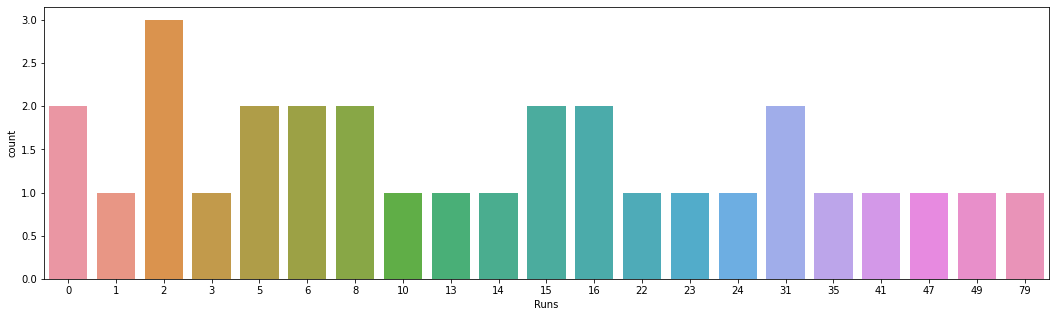

In [ ]:
#countplot for a day column 
plt.figure(figsize=(18,5))
sns.countplot(x='Runs', data=df)

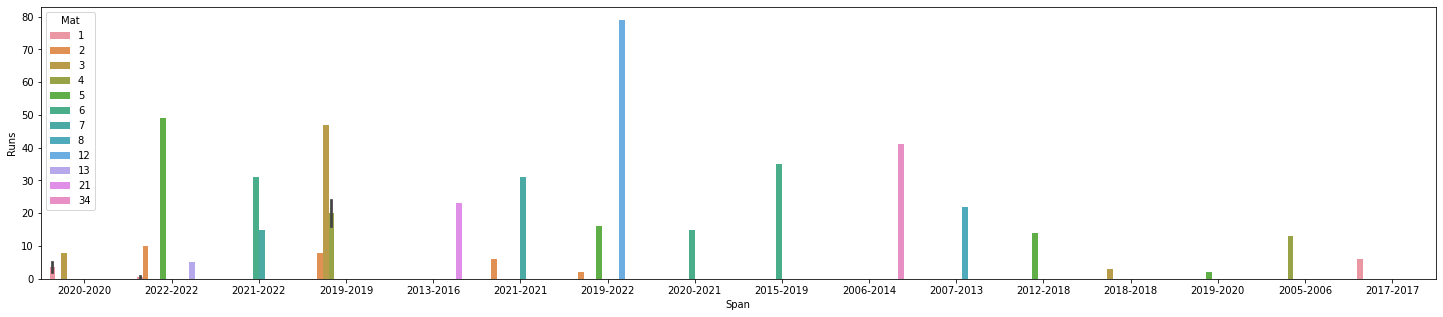

In [ ]:
#creating simple bar plot
plt.figure(figsize=(25,5))
sns.barplot(y='Runs',x='Span',hue='Mat', data=df)

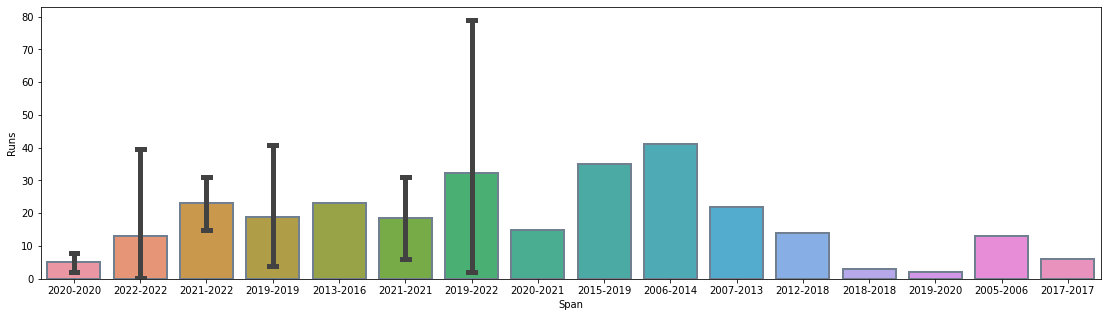

In [ ]:
plt.figure(figsize=(19,5))
sns.barplot(x='Span', y='Runs', data=df,errwidth=5, capsize=0.1, ci=99.5, edgecolor='slategray', linewidth=2)

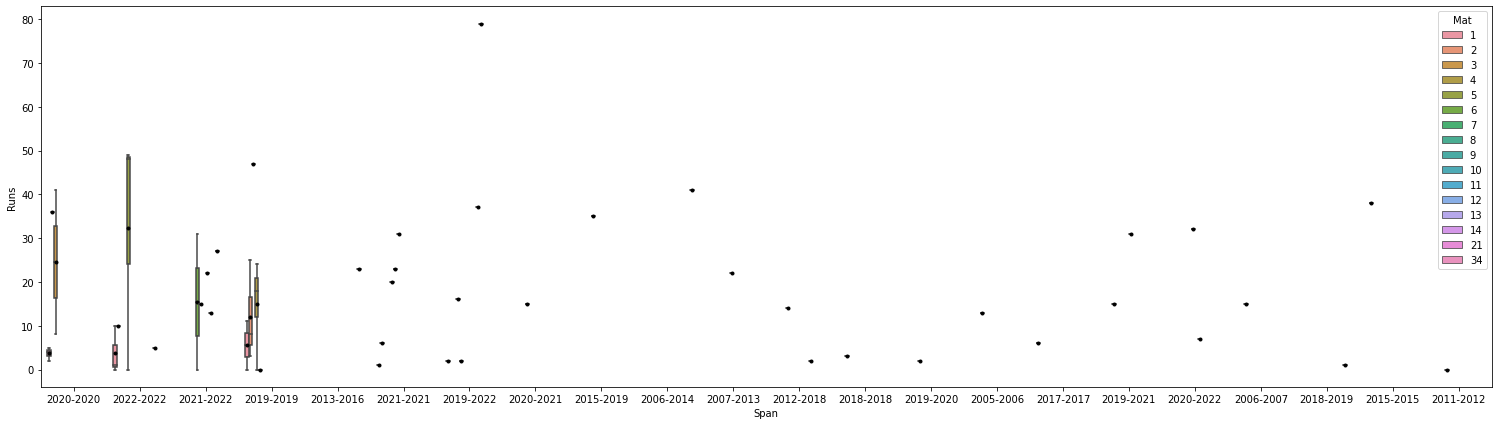

In [ ]:
plt.figure(figsize=(26,7))
df = data.head(60)
sns.boxplot(x='Span',y='Runs',hue='Mat',data=df,showmeans=True, meanprops={"marker":"o" ,"markerfacecolor":"black","markersize":"3" ,"markeredgecolor":"black"})

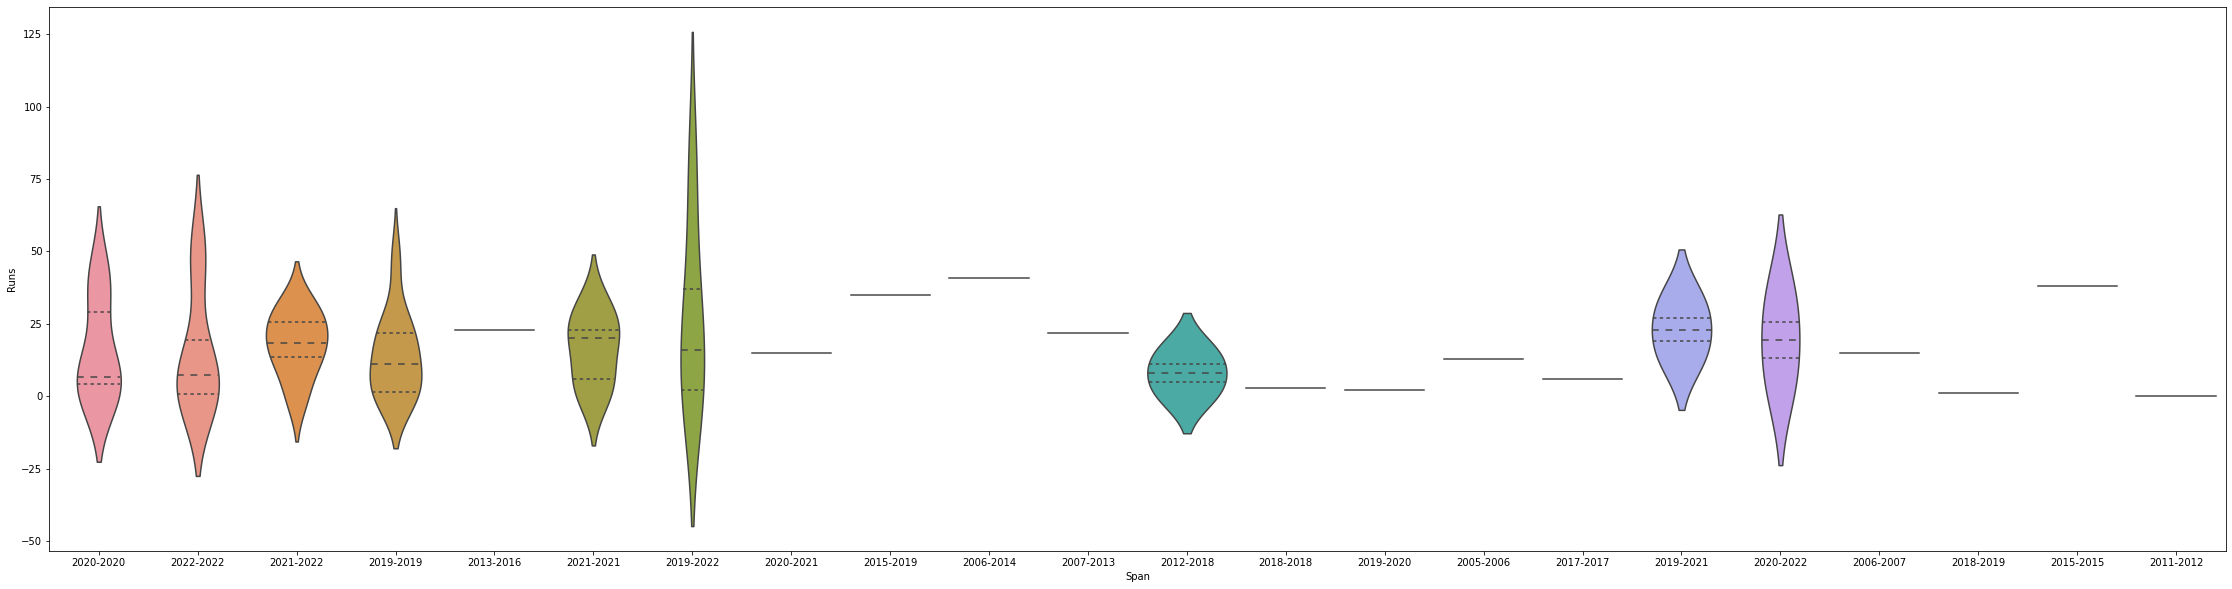

In [ ]:
plt.figure(figsize=(39,10))
sns.violinplot(x='Span',y='Runs',data=df,split=True,inner='quartile')
plt.show()

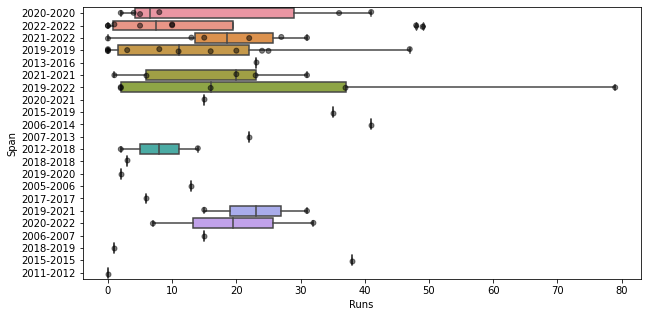

In [ ]:
#strip plot with boxplot
plt.figure(figsize=(10,5))
sns.boxplot(x='Runs', y='Span', data=df)
sns.stripplot(x='Runs', y='Span', data=df,color='black',alpha=0.5,linewidth=1)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


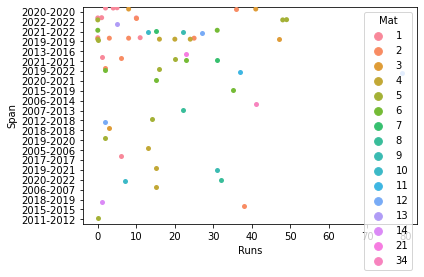

In [ ]:
sns.swarmplot(y = "Span", x = "Runs", hue = "Mat", orient = "h",dodge =True, data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


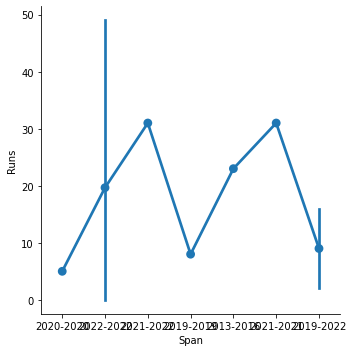

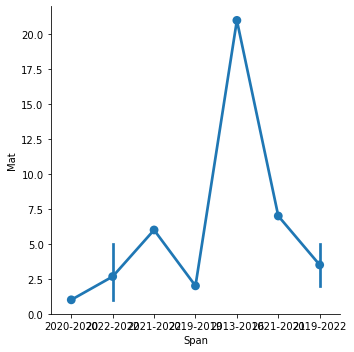

In [ ]:
# importing required library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
  
# read a csv file
df = data.head(10)
  
# point plot using factor plot
sns.factorplot(x ='Span', y ='Runs', data = df)
# Show the plots
plt.show()